Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np

Loading the Dataset

In [2]:
data =  pd.read_csv('/content/breast_cancer.csv')

Displaying first few rows

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Checking for Missing Values

In [4]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Training and Testing DataSet

Importing the Dependencies

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [32]:
# Encode the target variable (diagnosis: M = 1, B = 0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Define the features and target variable
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

# Check for NaN or infinite values and handle them
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)

# Ensure no NaN values in target variable y
y.fillna(0, inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Evaluating multiple classification models

In [33]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000)  # Increased max_iter for convergence
}

Storing the performance of each model

In [34]:
model_performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_performance[name] = {
        'Accuracy': accuracy,
        'Classification Report': report
    }

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

Visualizing the Performance

Importing the Dependencies

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


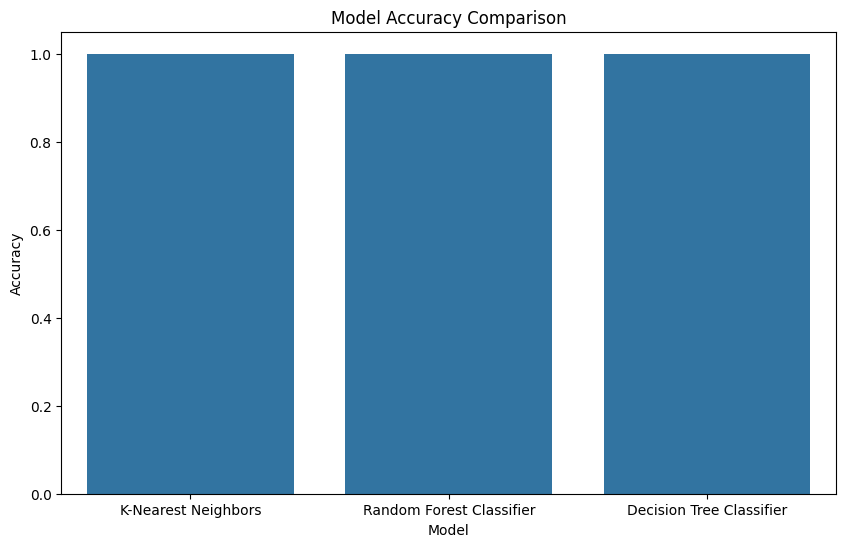

In [35]:
# Bar plot of accuracy scores
accuracies = [performance['Accuracy'] for performance in model_performance.values()]
model_names = list(model_performance.keys())

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

Evaluating the models

In [36]:
for name, performance in model_performance.items():
    print(f"Model: {name}")
    print(f"Accuracy: {performance['Accuracy']}")
    print("Classification Report:")
    print(performance['Classification Report'])
    print("-" * 60)

Model: K-Nearest Neighbors
Accuracy: 1.0
Classification Report:
{'0.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 114}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 114}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 114}}
------------------------------------------------------------
Model: Random Forest Classifier
Accuracy: 1.0
Classification Report:
{'0.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 114}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 114}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 114}}
------------------------------------------------------------
Model: Decision Tree Classifier
Accuracy: 1.0
Classification Report:
{'0.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 114}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'su